Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4977 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3741 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.8776
Epoch 4/5

AttributeError: ignored

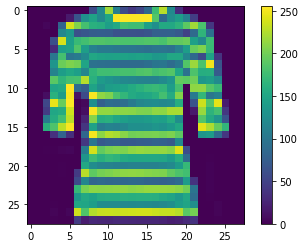

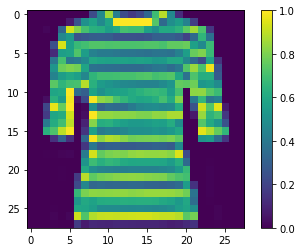

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#load data
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#check shape
X_train.shape, y_train.shape

#definig class name
class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal',
           'shirt', 'sneaker', 'bag', 'ankle boot']
           
#plot image using colorbar
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

#changing scale 0-255 to 0-1
X_train = X_train/255.0
X_test = X_test/255.0

#checking plot image using colorbar again
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

#building model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
#we can pass an array in sequential model or just add another layer
model.add(Flatten(input_shape = (28,28)))
#flatten is used to change input data in 1d
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

#compilation of our model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
             
#fit the model
model.fit(X_train, y_train, epochs=5)

#evaluate model
model.evaluate(X_test, y_test)

#checking pred
pred = model.predict(X_test)
pred[5]
 
#plottig with image
x=98
plt.figure()
plt.imshow(X_test[x])
plt.colorbar()
np.argmax(pred[x])